In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavio
import wave
import sys
import matplotlib
import datetime
import csv
import pandas as pd

In [2]:
def getWavInt16Data(wavfile):
    wavreader = wave.open(wavfile,"r")
    wavbytes = wavreader.readframes(-1)
    wavdata =  np.fromstring(wavbytes, "Int16")
    return wavdata

# todo list:
## 1. y軸座是ampitude (聲量)
## 2. y軸刻度以5為底

In [15]:
def plot_wav_points(wavfile=None, csvfile=None):
    print("current processing file is {}".format(wavfile))
    
    audio = getWavInt16Data(wavfile)
    audioLen = len(audio)
    draw_base = 32000
    x_scale_base = 16000
    plot_x_base = 400
    plot_pos_offset = 0
    total_figs = int(np.ceil(audioLen/draw_base))
    point_size=10
    px=0
    py=0
    fig_width = 160
    fig_height = 80
    fig_offset = draw_base/x_scale_base
    df = pd.read_csv(csvfile, dtype={'int8':np.int8,'int32':np.int8,'float32':np.int8})
#     predictionAry = df["prediction"]
    total_csv_rows = df.shape[0]
    print("the raw wav length is {}".format(audioLen))
    print("total rows are {}".format(total_csv_rows))
    print("the raw wav lenght in 25ms is {}".format(np.ceil((audioLen-1200)/400)))
    points_per_fig = int((draw_base/x_scale_base)*40) #int(np.ceil(total_csv_rows/total_figs))
#     draw_loop = int(np.ceil(total_csv_rows/points_per_fig))
#     print("points per figure are {}".format(draw_loop))
    plot_upper_y_pos_base = 22000
    plot_button_y_pos_base = 2000
    y_offset = 2000
    spotsize = 1500
    for i in range(total_figs):
        clip = audio[i*draw_base:(i+1)*draw_base]
        fig, ax = plt.subplots(1, figsize=[fig_width,fig_height],dpi=10)
        ax.set_xlabel('time seconds')
        ax.xaxis.label.set_size(100)
        ax.set_ylabel('frequency kHz')
        ax.yaxis.label.set_size(100)
        
        ax.tick_params(axis='both', which='major', labelsize=80)
        ax.plot(clip,alpha=0.7)
        scale = 1e3
        ticks = matplotlib.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))
        ax.yaxis.set_major_formatter(ticks)
        def timeTicks(x, pos):
            d = x/x_scale_base + (i * fig_offset) 
            return str(d)
        formatter = matplotlib.ticker.FuncFormatter(timeTicks)
        ax.xaxis.set_major_formatter(formatter)
        ax.grid=True
        start = i*points_per_fig
        end = (i+1)*points_per_fig
        print("df start is {} and end is {}".format(start,end))
        small_df_int8 = df["int8"][start:end]
        small_df_int32 = df["int32"][start:end]
        small_df_float32 = df["float32"][start:end]
        small_df_ans = df["answer"][start:end]
        try:
            for p in range(len(small_df_int8)):
                idx = p + start
                int8_x_pos = p*plot_x_base+plot_pos_offset
                if small_df_int8[idx] == 1:
                    ax.scatter(int8_x_pos,plot_upper_y_pos_base,spotsize,c="g")
                else:
                    ax.scatter(int8_x_pos,plot_button_y_pos_base,spotsize,c="g")
                    
            for k in range(len(small_df_int32)):
                idx = k + start
                int32_x_pos = k*plot_x_base+plot_pos_offset
                if small_df_int32[idx] == 1:
                    ax.scatter(int32_x_pos,plot_upper_y_pos_base-y_offset,spotsize,c="blue")
                else:
                    ax.scatter(int32_x_pos,plot_button_y_pos_base+y_offset,spotsize,c="blue")
                    
            for m in range(len(small_df_float32)):
                idx = m + start
                float32_x_pos = m*plot_x_base+plot_pos_offset
                if small_df_float32[idx] == 1:
                    ax.scatter(float32_x_pos,plot_upper_y_pos_base-2*y_offset,spotsize,c="black")
                else:
                    ax.scatter(float32_x_pos,plot_button_y_pos_base+2*y_offset,spotsize,c="black")
                    
            for n in range(len(small_df_ans)):
                idx = n + start
                ans_x_pos = n*plot_x_base+plot_pos_offset
                if small_df_ans[idx] == 1:
                    ax.scatter(ans_x_pos,plot_upper_y_pos_base-3*y_offset,spotsize,c="lime")
                else:
                    ax.scatter(ans_x_pos,plot_button_y_pos_base+3*y_offset,spotsize,c="lime")
                    
            plt.savefig("./figoutput/fig{}.png".format(i))
            
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
        
        plt.show()

current processing file is ../../../speechData/clean_speech/MIR-1K/amy_1_lyrics.wav
the raw wav length is 488448
total rows are 1160
the raw wav lenght in 25ms is 1219.0
df start is 0 and end is 80


/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


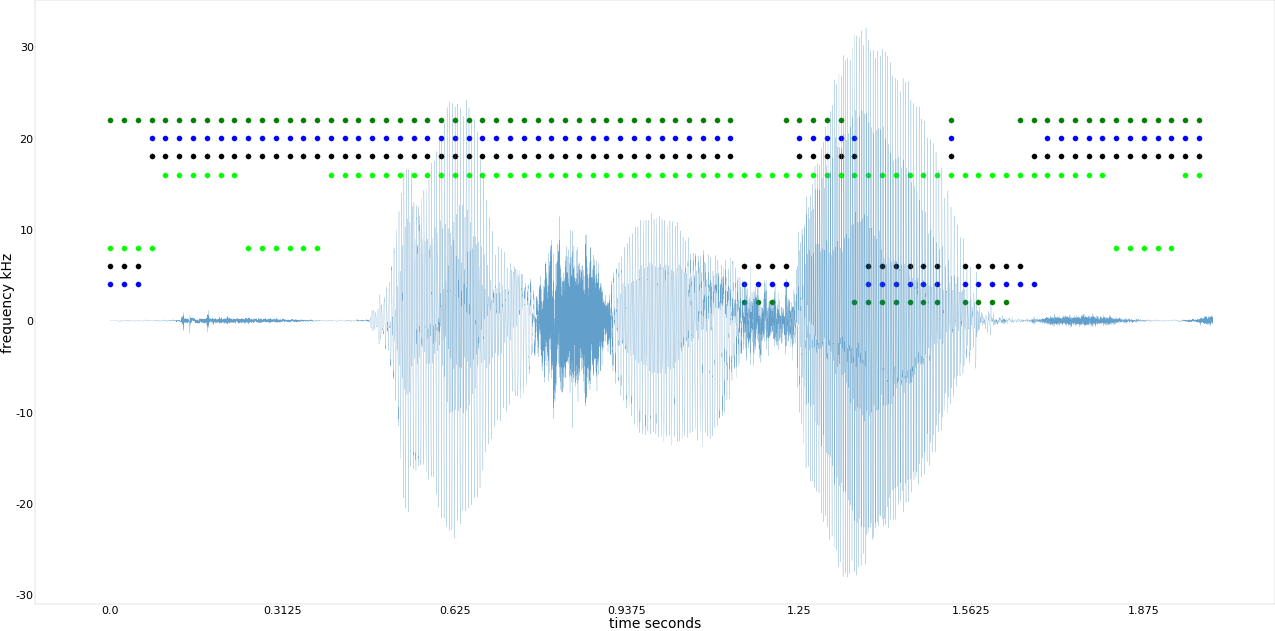

df start is 80 and end is 160


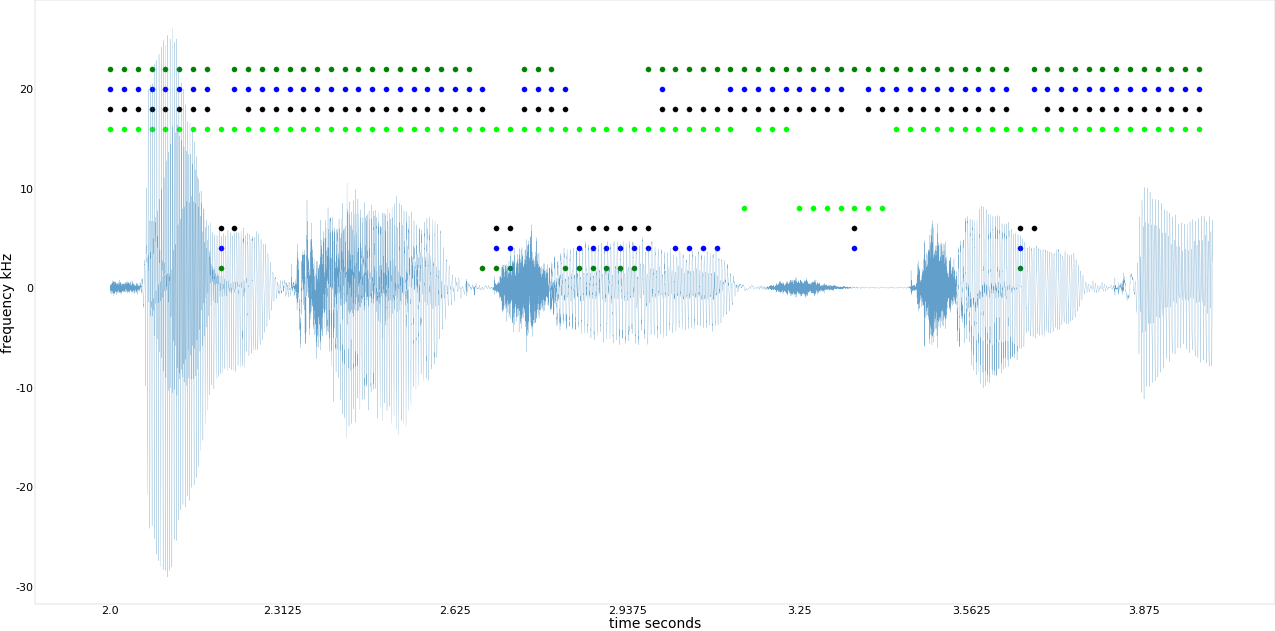

df start is 160 and end is 240


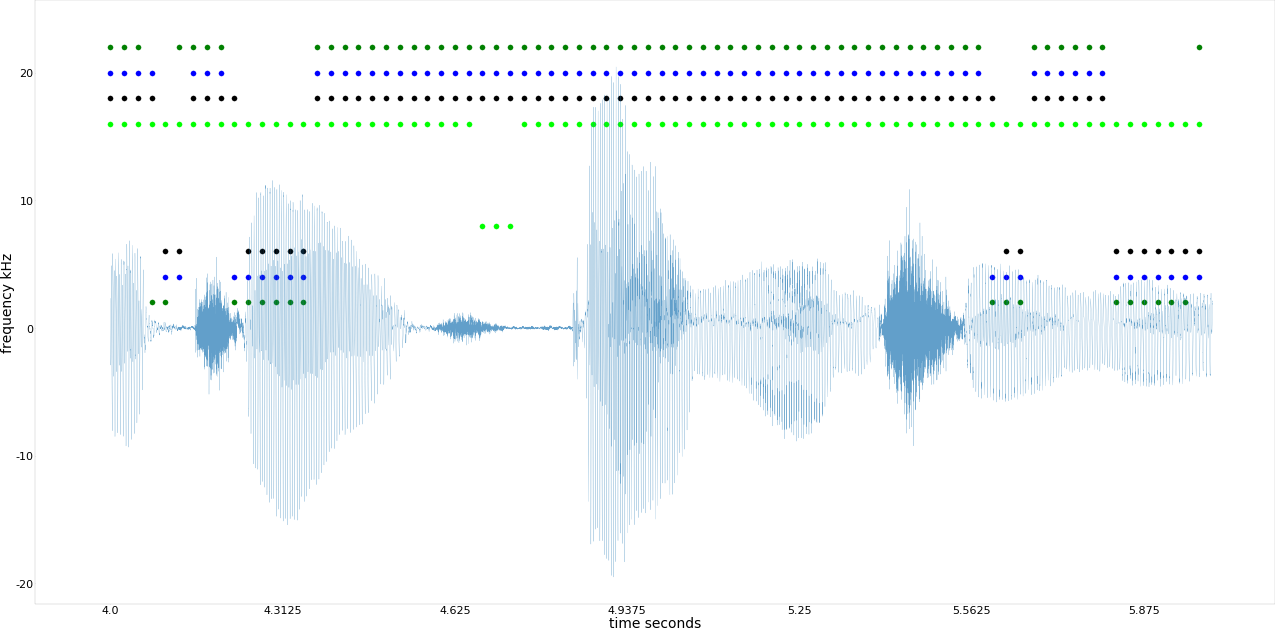

df start is 240 and end is 320


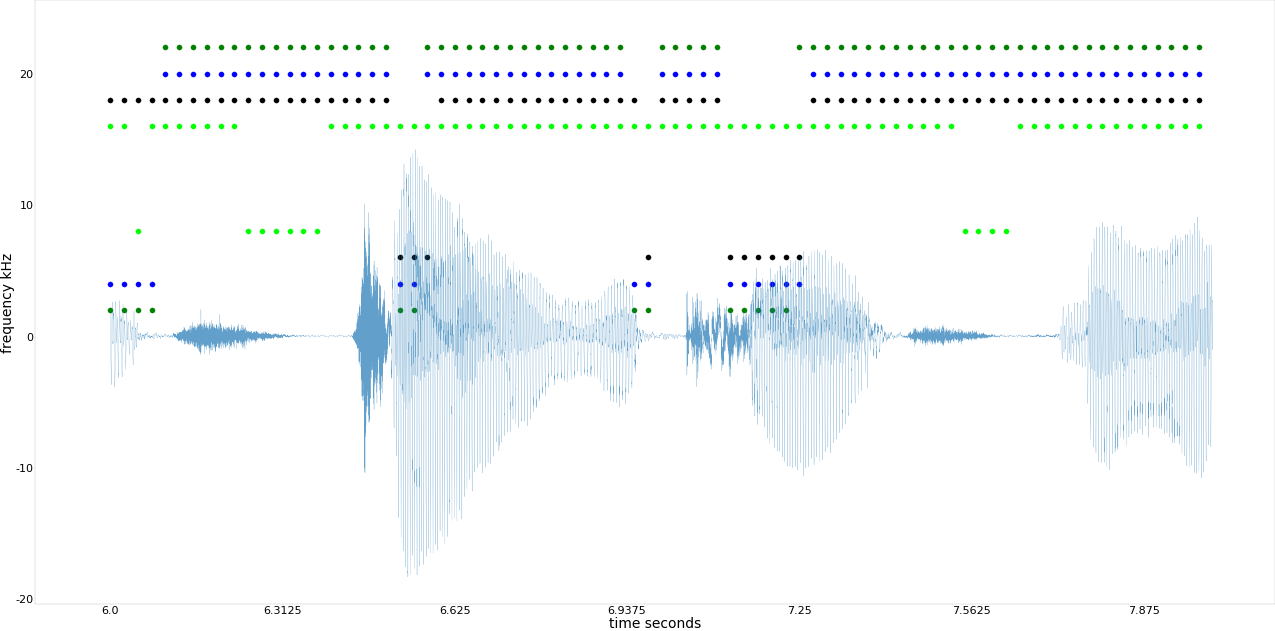

df start is 320 and end is 400


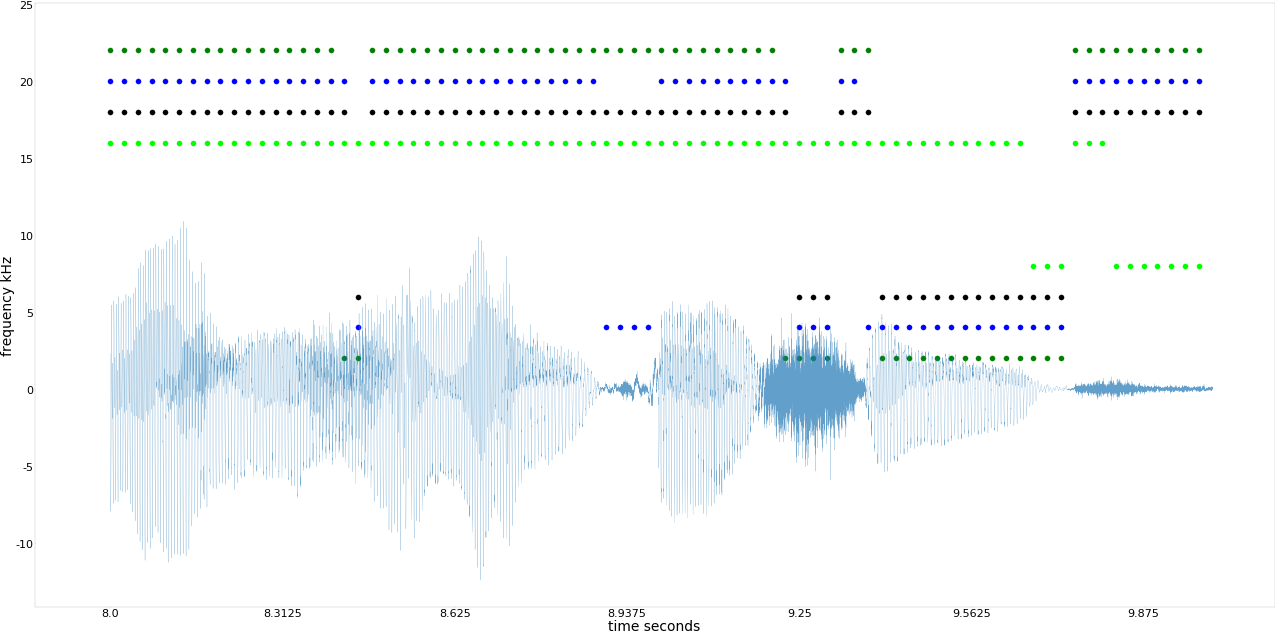

df start is 400 and end is 480


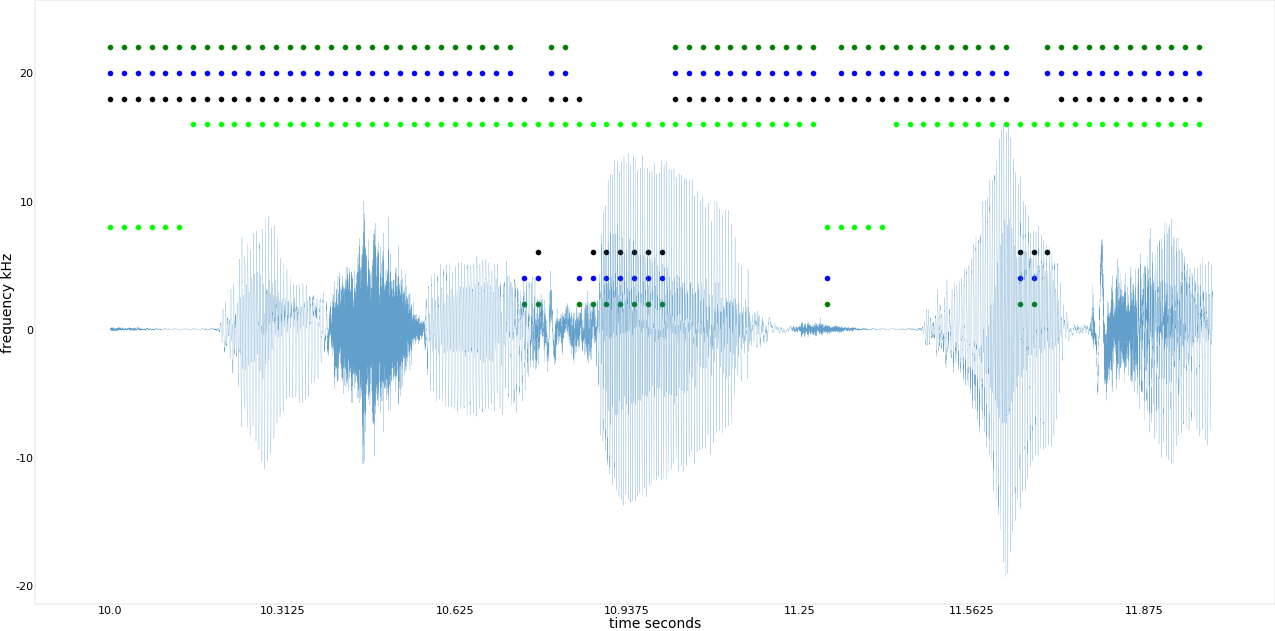

df start is 480 and end is 560


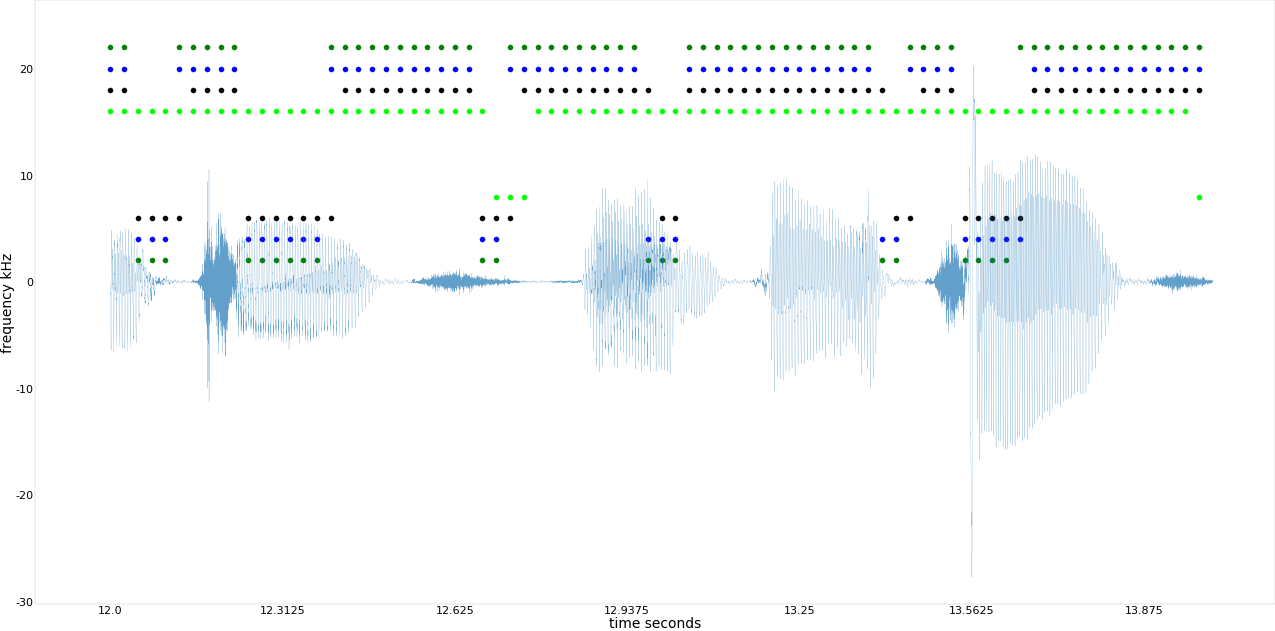

df start is 560 and end is 640


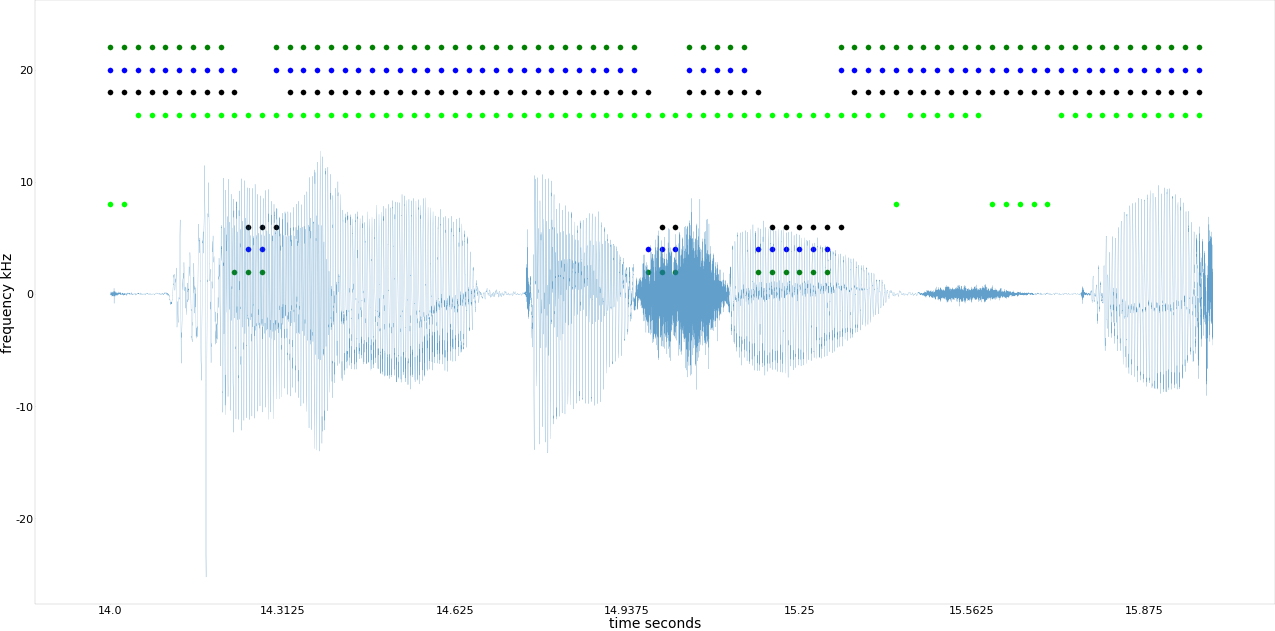

df start is 640 and end is 720


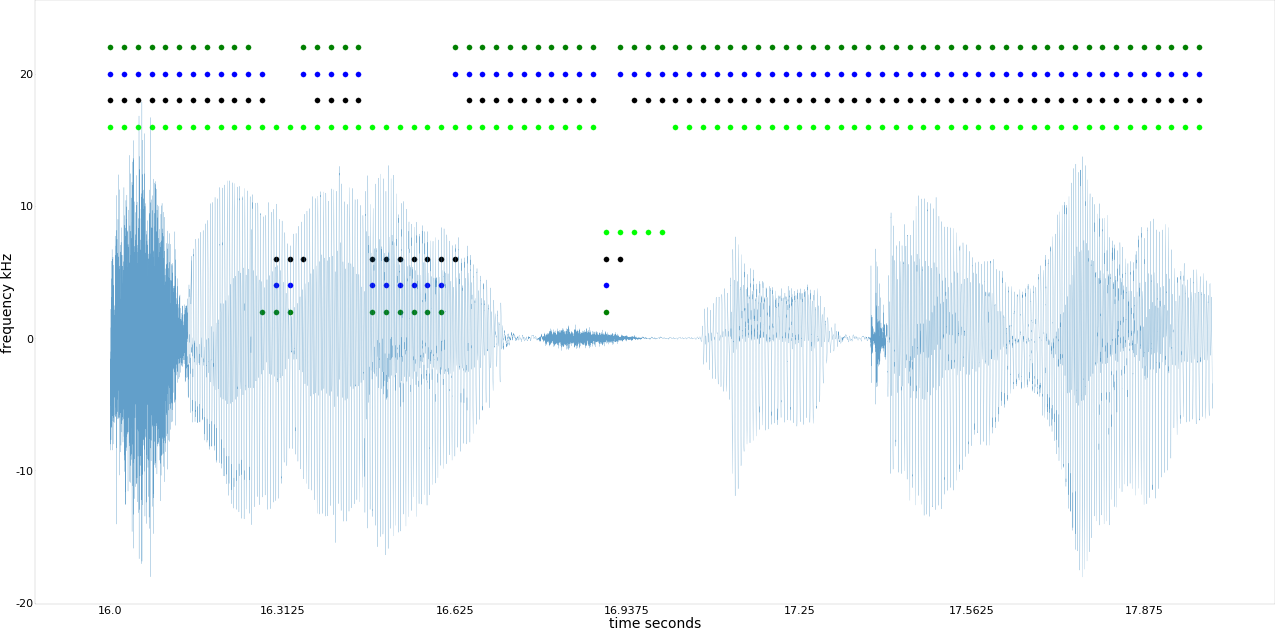

df start is 720 and end is 800


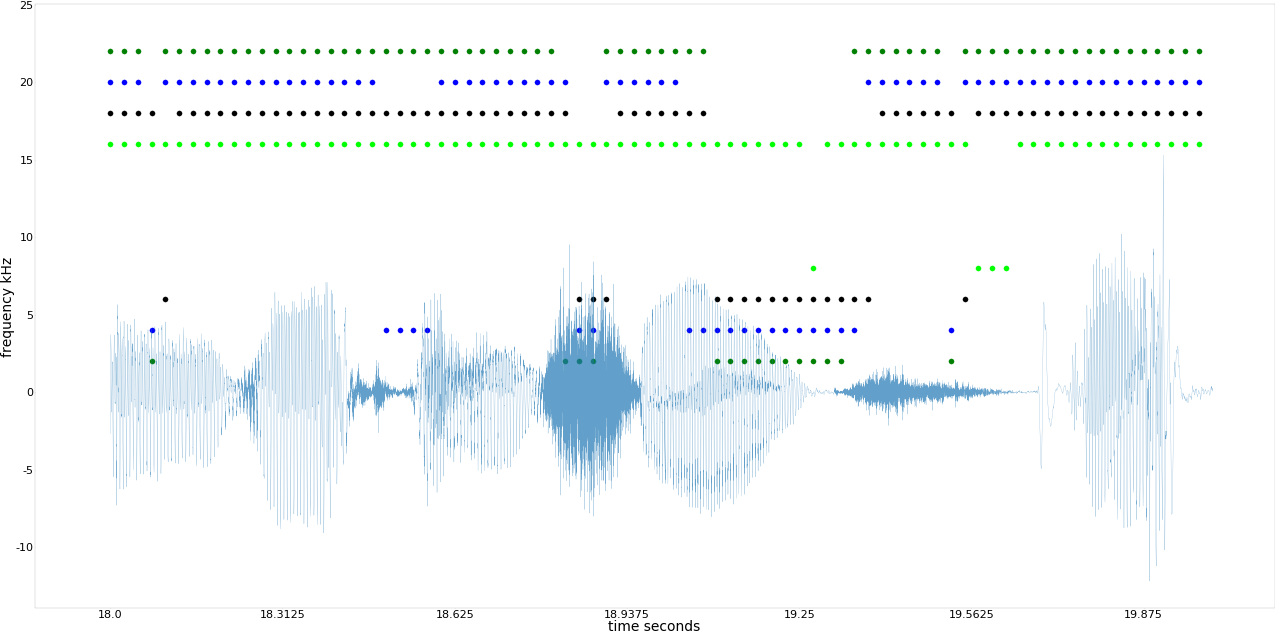

df start is 800 and end is 880


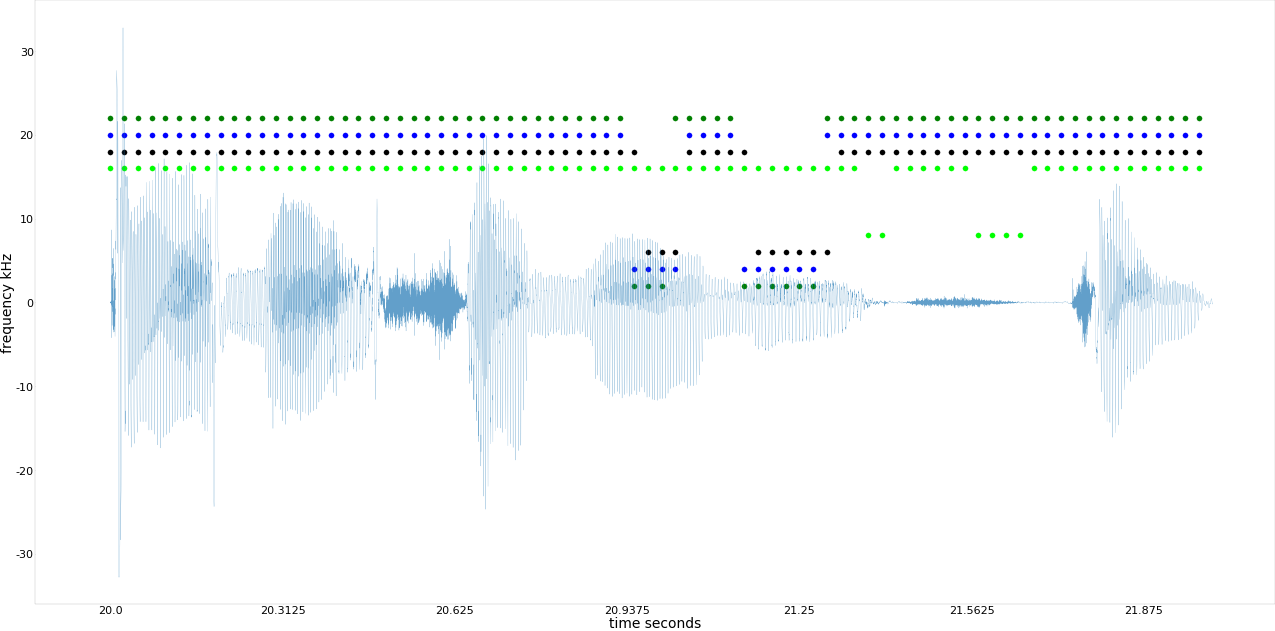

df start is 880 and end is 960


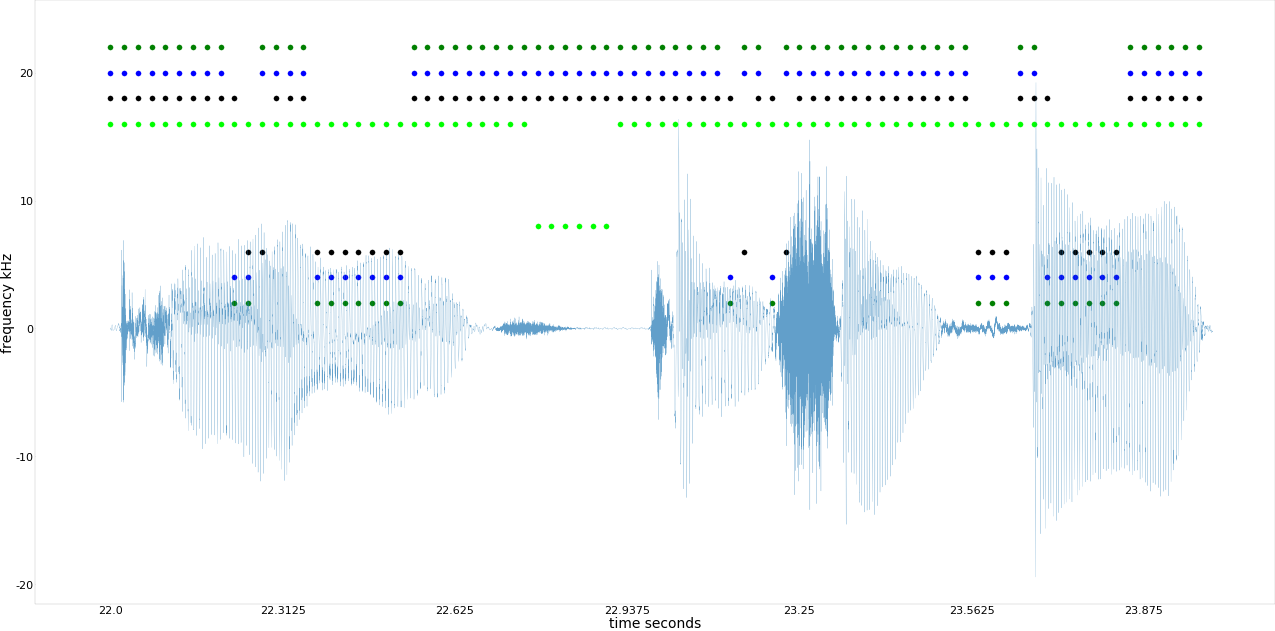

df start is 960 and end is 1040


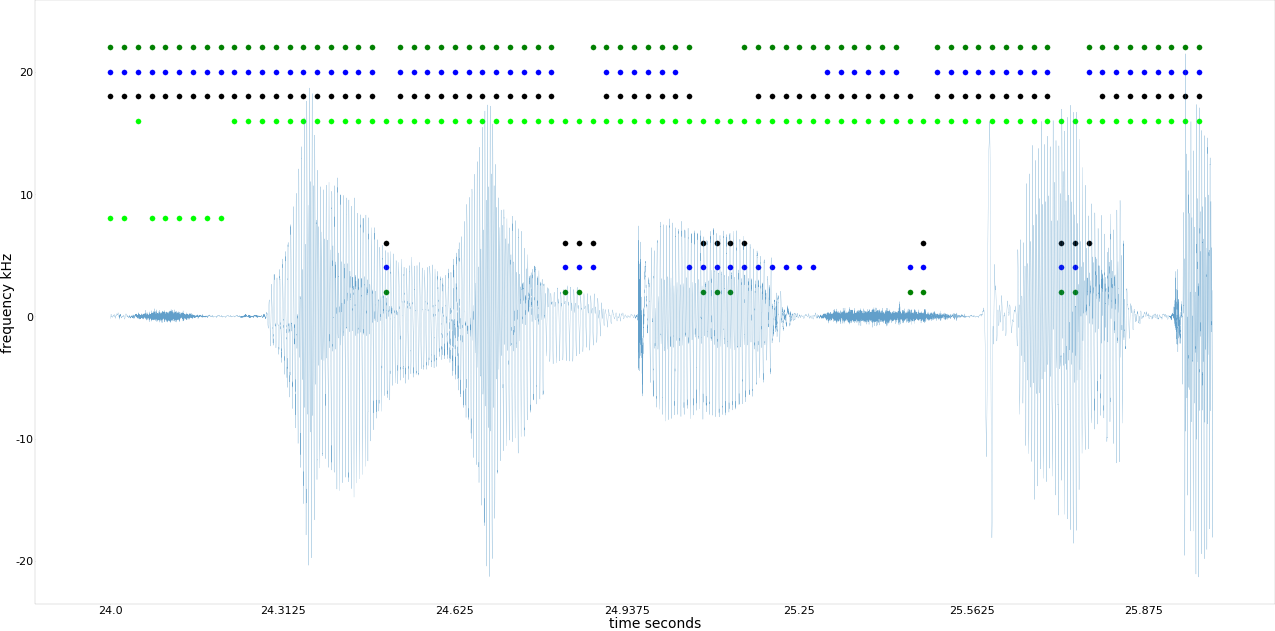

df start is 1040 and end is 1120


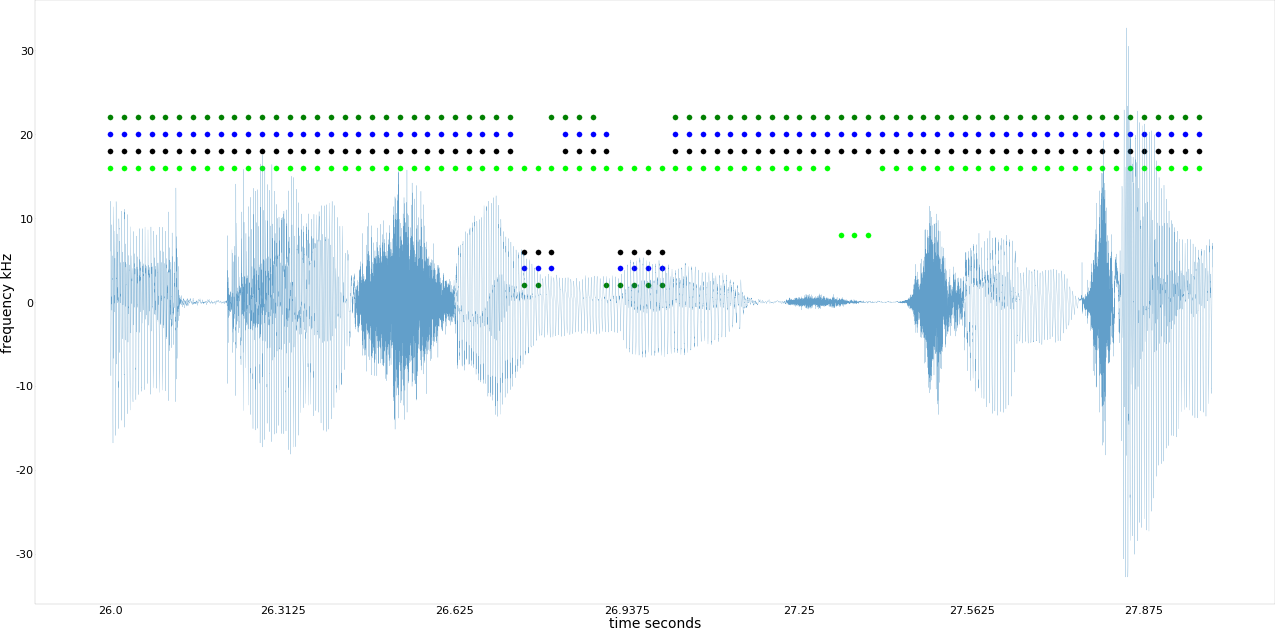

df start is 1120 and end is 1200


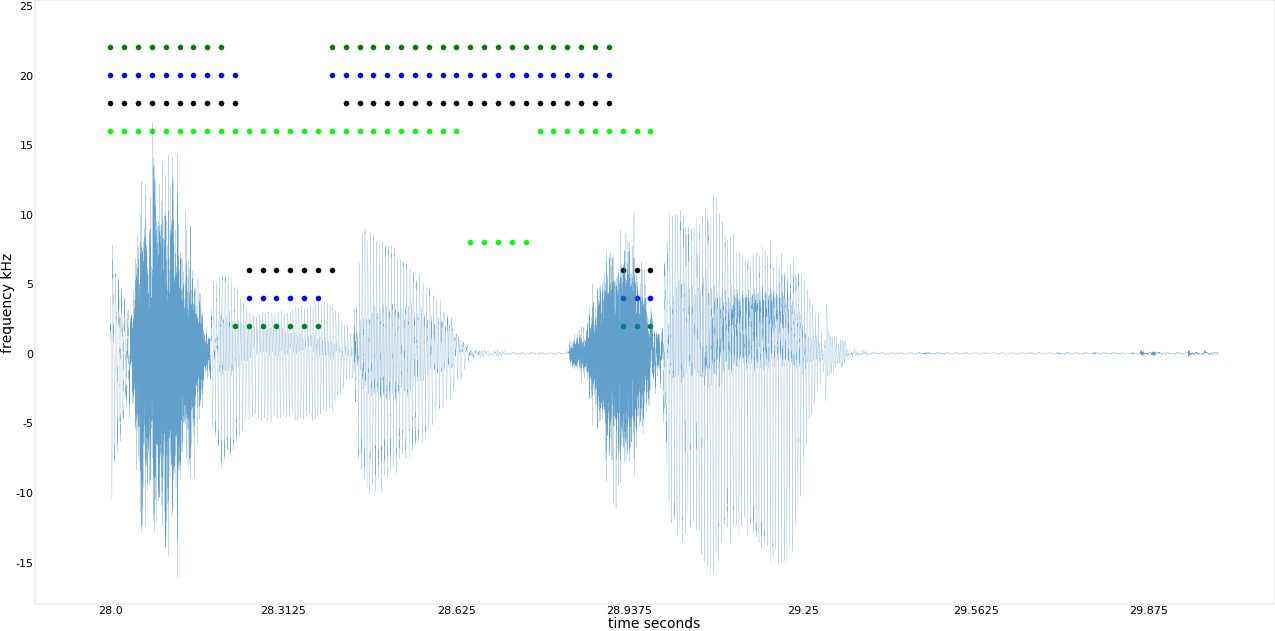

df start is 1200 and end is 1280


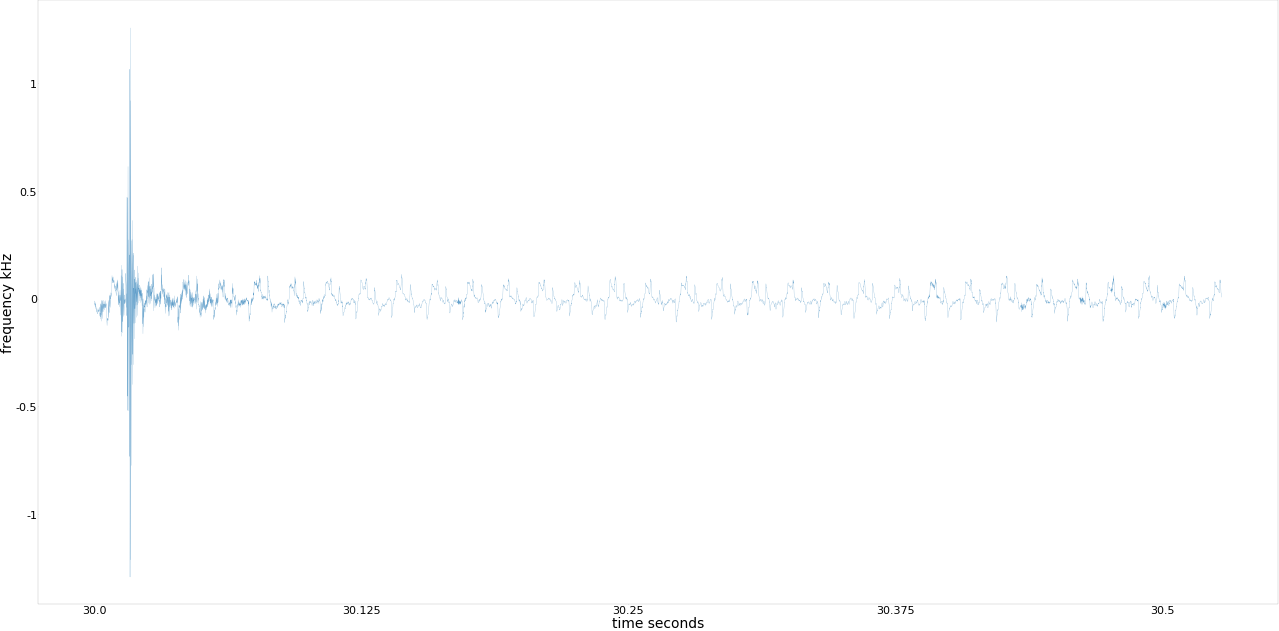

In [16]:
currentDir = os.getcwd()
# processing_file = currentDir+"/theData/amy_1_lyrics.wav"
wav_file = "../../../speechData/clean_speech/MIR-1K/amy_1_lyrics.wav"
csv_file = "./amy1.csv"
plot_wav_points(wav_file,csv_file)